## Policy Iteration / Value Iteration

In [33]:
from maze import *
import numpy as np

In [34]:
env = Maze()
initial_state = env.reset()

In [41]:
# Value Iteration
theta = 0.001 # Tolerance level for convergence
gamma = 0.9 # Discount factor
num_states = env.snum
num_actions = env.anum
V = np.zeros(num_states)
pi = np.zeros(num_states)
q_star = np.zeros((num_states, num_actions)) # Optimal q values

# slip_actions = {0: 3, 1: 2, 2: 0, 3: 1} # Slips clockwise
# slip_transition_probability = 0.1
# no_slip_transition_probability = 0.9

In [45]:
# Get the optimal values
epochs = 5000
for i in range(epochs):
    delta = 0 # Represents the difference between the current value vs next state value
    for s in range(num_states):
        v = V[s]
        v_actions = np.zeros(num_actions)
        for a in range(num_actions):
            r, s_prime, done = env.step(s, a) # No slip, Reward, next_state
            
            # BELLMAN EQUATION
            if done:
                v_actions[a] = r + gamma * V[s_prime] # NOT SURE ABOUT THIS BECAUSE OF TRANSITION PROBABILITY
            else:
                v_actions[a] = 0.9 * (r + gamma * V[s_prime])

        # Get the max value for all of the actions    
        V[s] = np.max(v_actions)
        delta = max(delta, abs(v - V[s]))

    print(f"Epochs: {i}, delta: {delta}")
    if delta < theta:
        break


# Output deterministic policy
for s in range(num_states):
    v_actions = np.zeros(num_actions)
    for a in range(num_actions):
        r, s_prime, done = env.step(s, a)

        if done:
            v_actions[a] = r + gamma * V[s_prime] 
        else:
            v_actions[a] = 0.9 * (r + gamma * V[s_prime])

    # Get the action with highest value
    pi[s] = np.argmax(v_actions)


# Run the optimal policy and print actions taken at each time step
state = env.reset()
done = False
for s in range(num_states):
    a = pi[s]
    reward, s_prime, done = env.step(s, a)
    env.plot(int(s_prime), int(a))
    state = s_prime
print('Optimal policy action sequence:', pi)

Epochs: 0, delta: 3.799999999999997
Epochs: 1, delta: 4.512655799999997
Epochs: 2, delta: 6.877999999999995
Epochs: 3, delta: 5.5711799999999965
Epochs: 4, delta: 3.799999999999997
Epochs: 5, delta: 3.799999999999997
Epochs: 6, delta: 5.699999999999999
Epochs: 7, delta: 5.699999999999999
Epochs: 8, delta: 5.699999999999999
Epochs: 9, delta: 5.699999999999999
Epochs: 10, delta: 5.482876796999996
Epochs: 11, delta: 4.441130205569998
Epochs: 12, delta: 3.7397699999999983
Epochs: 13, delta: 4.512655799999997
Epochs: 14, delta: 4.901292636444476
Epochs: 15, delta: 3.799999999999997
Epochs: 16, delta: 5.699999999999999
Epochs: 17, delta: 6.148431197999996
Epochs: 18, delta: 3.7397699999999983
Epochs: 19, delta: 5.482876796999996
Epochs: 20, delta: 11.385983699999993
Epochs: 21, delta: 9.222646796999994
Epochs: 22, delta: 7.470343905569996
Epochs: 23, delta: 10.316999999999997
Epochs: 24, delta: 3.6552511979999975
Epochs: 25, delta: 11.385983699999993
Epochs: 26, delta: 7.470343905569996
Epoc

In [46]:
# Optimal Q values and save to .npy file
for s in range(num_states):
    for a in range(num_actions):
        r, s_prime, done = env.step(s, a)

        if done:
            q_star[s, a] = r + gamma * V[s_prime]
        else:
            q_star[s, a] = 0.9 * (r + gamma * V[s_prime])
np.save('optimal_Q_values.npy', q_star)

## Q - Learning
NOTES:
- Q: Quality of action from a specific state

In [47]:
from evaluation import *
import matplotlib.pyplot as plt

In [48]:
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1
q_t = np.zeros((num_states, num_actions)) # Q value at each time step

In [50]:
eval_steps, eval_reward = [], []
learning = True

epochs = 5000
# while learning:
for i in range(epochs):
    print(f"Epochs: {i}")

    s = env.reset()

    # Episode finishes if next step reaches finish
    done = False
    while not done:
        # Action selection
        a = get_action_egreedy(q_t, epsilon, s)

        # Forward Pass
        # Take action
        s_prime, r, done = env.step(a)
        old_value = q_t[state, action]
        next_max = np.max(q_t[s_prime])
        
        # Compute loss function(aka RMSE)
        q_err = np.sqrt(np.mean((q_t - q_star)**2))
        print("Step Error: ", q_err)

        # Backward Pass
        q_t[s, a] = q_t[s, a] + alpha * (r + gamma * np.max(q_t[s_prime, :]) - q_t[s, a])

        # Update current state and action
        s = s_prime
    
    # Evaluate current policy 
    if i % 50 == 0:
        avg_step, avg_reward = evaluation(env, q_t)
        eval_steps.append(avg_step)
        eval_reward.append(avg_reward)

Epochs: 0


TypeError: get_action_egreedy() takes 2 positional arguments but 3 were given

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

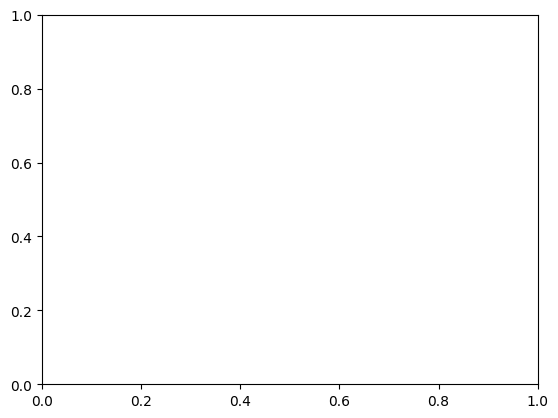

In [32]:
# Plot example #
f1, ax1 = plt.subplots()
ax1.plot(np.arange(0,5000,50),eval_steps)#repeat for different algs.
f2, ax2 = plt.subplots()
ax2.plot(np.arange(0,5000,50),eval_reward)#repeat for different algs.

## Continuous State Space Problems